In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## EDA

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

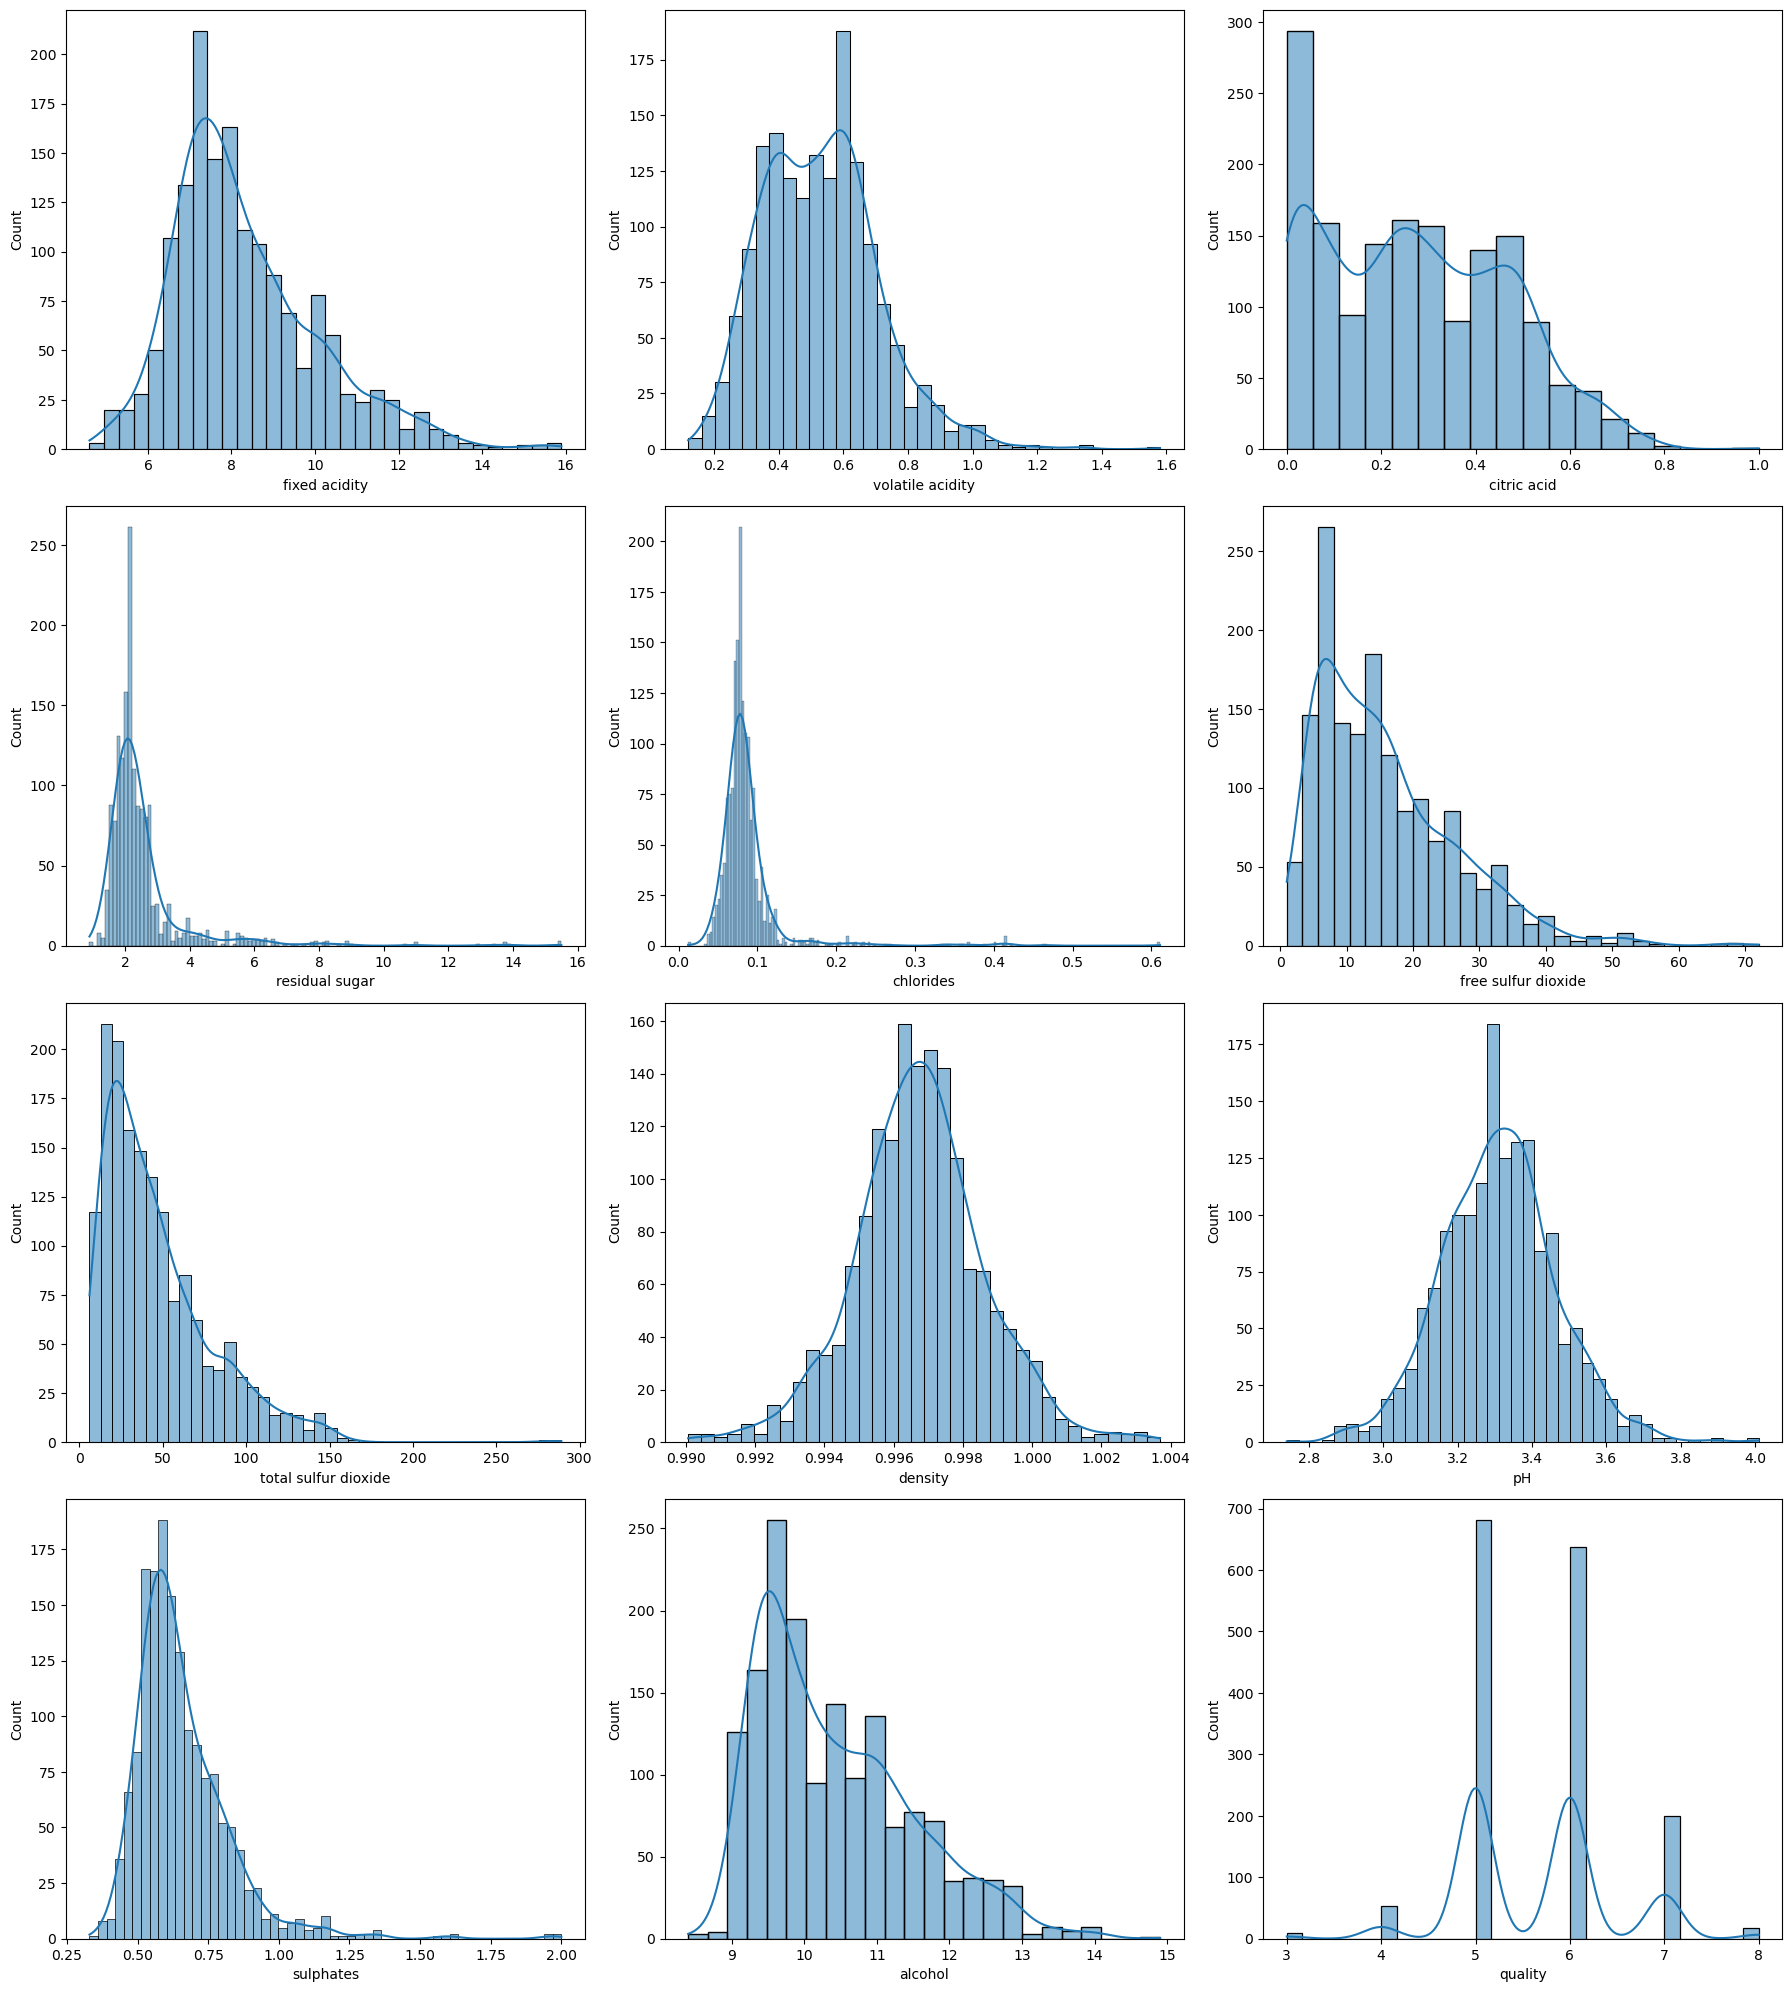

In [6]:
features = [feature for feature in df.columns]

fig = plt.figure(figsize=(18, 20))
for index, column in enumerate(features):
    plt.subplot(4, 3, index+1)
    sns.histplot(df[column], kde=True)
fig.tight_layout(pad=1.0)

Nous pouvons observer que plusieurs features suivent une loi normale. ce qui implique que:
- eda

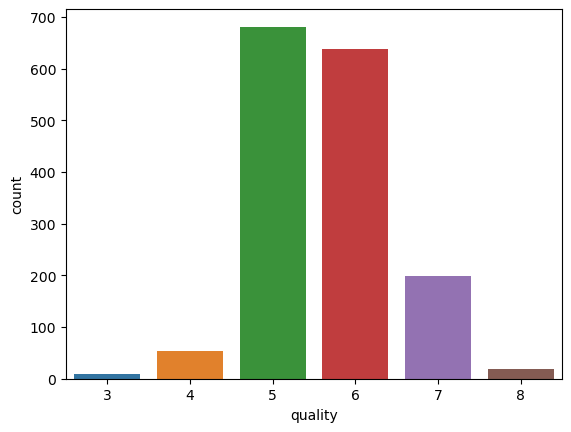

In [7]:
ax = sns.countplot(x='quality', data=df)

## outliers

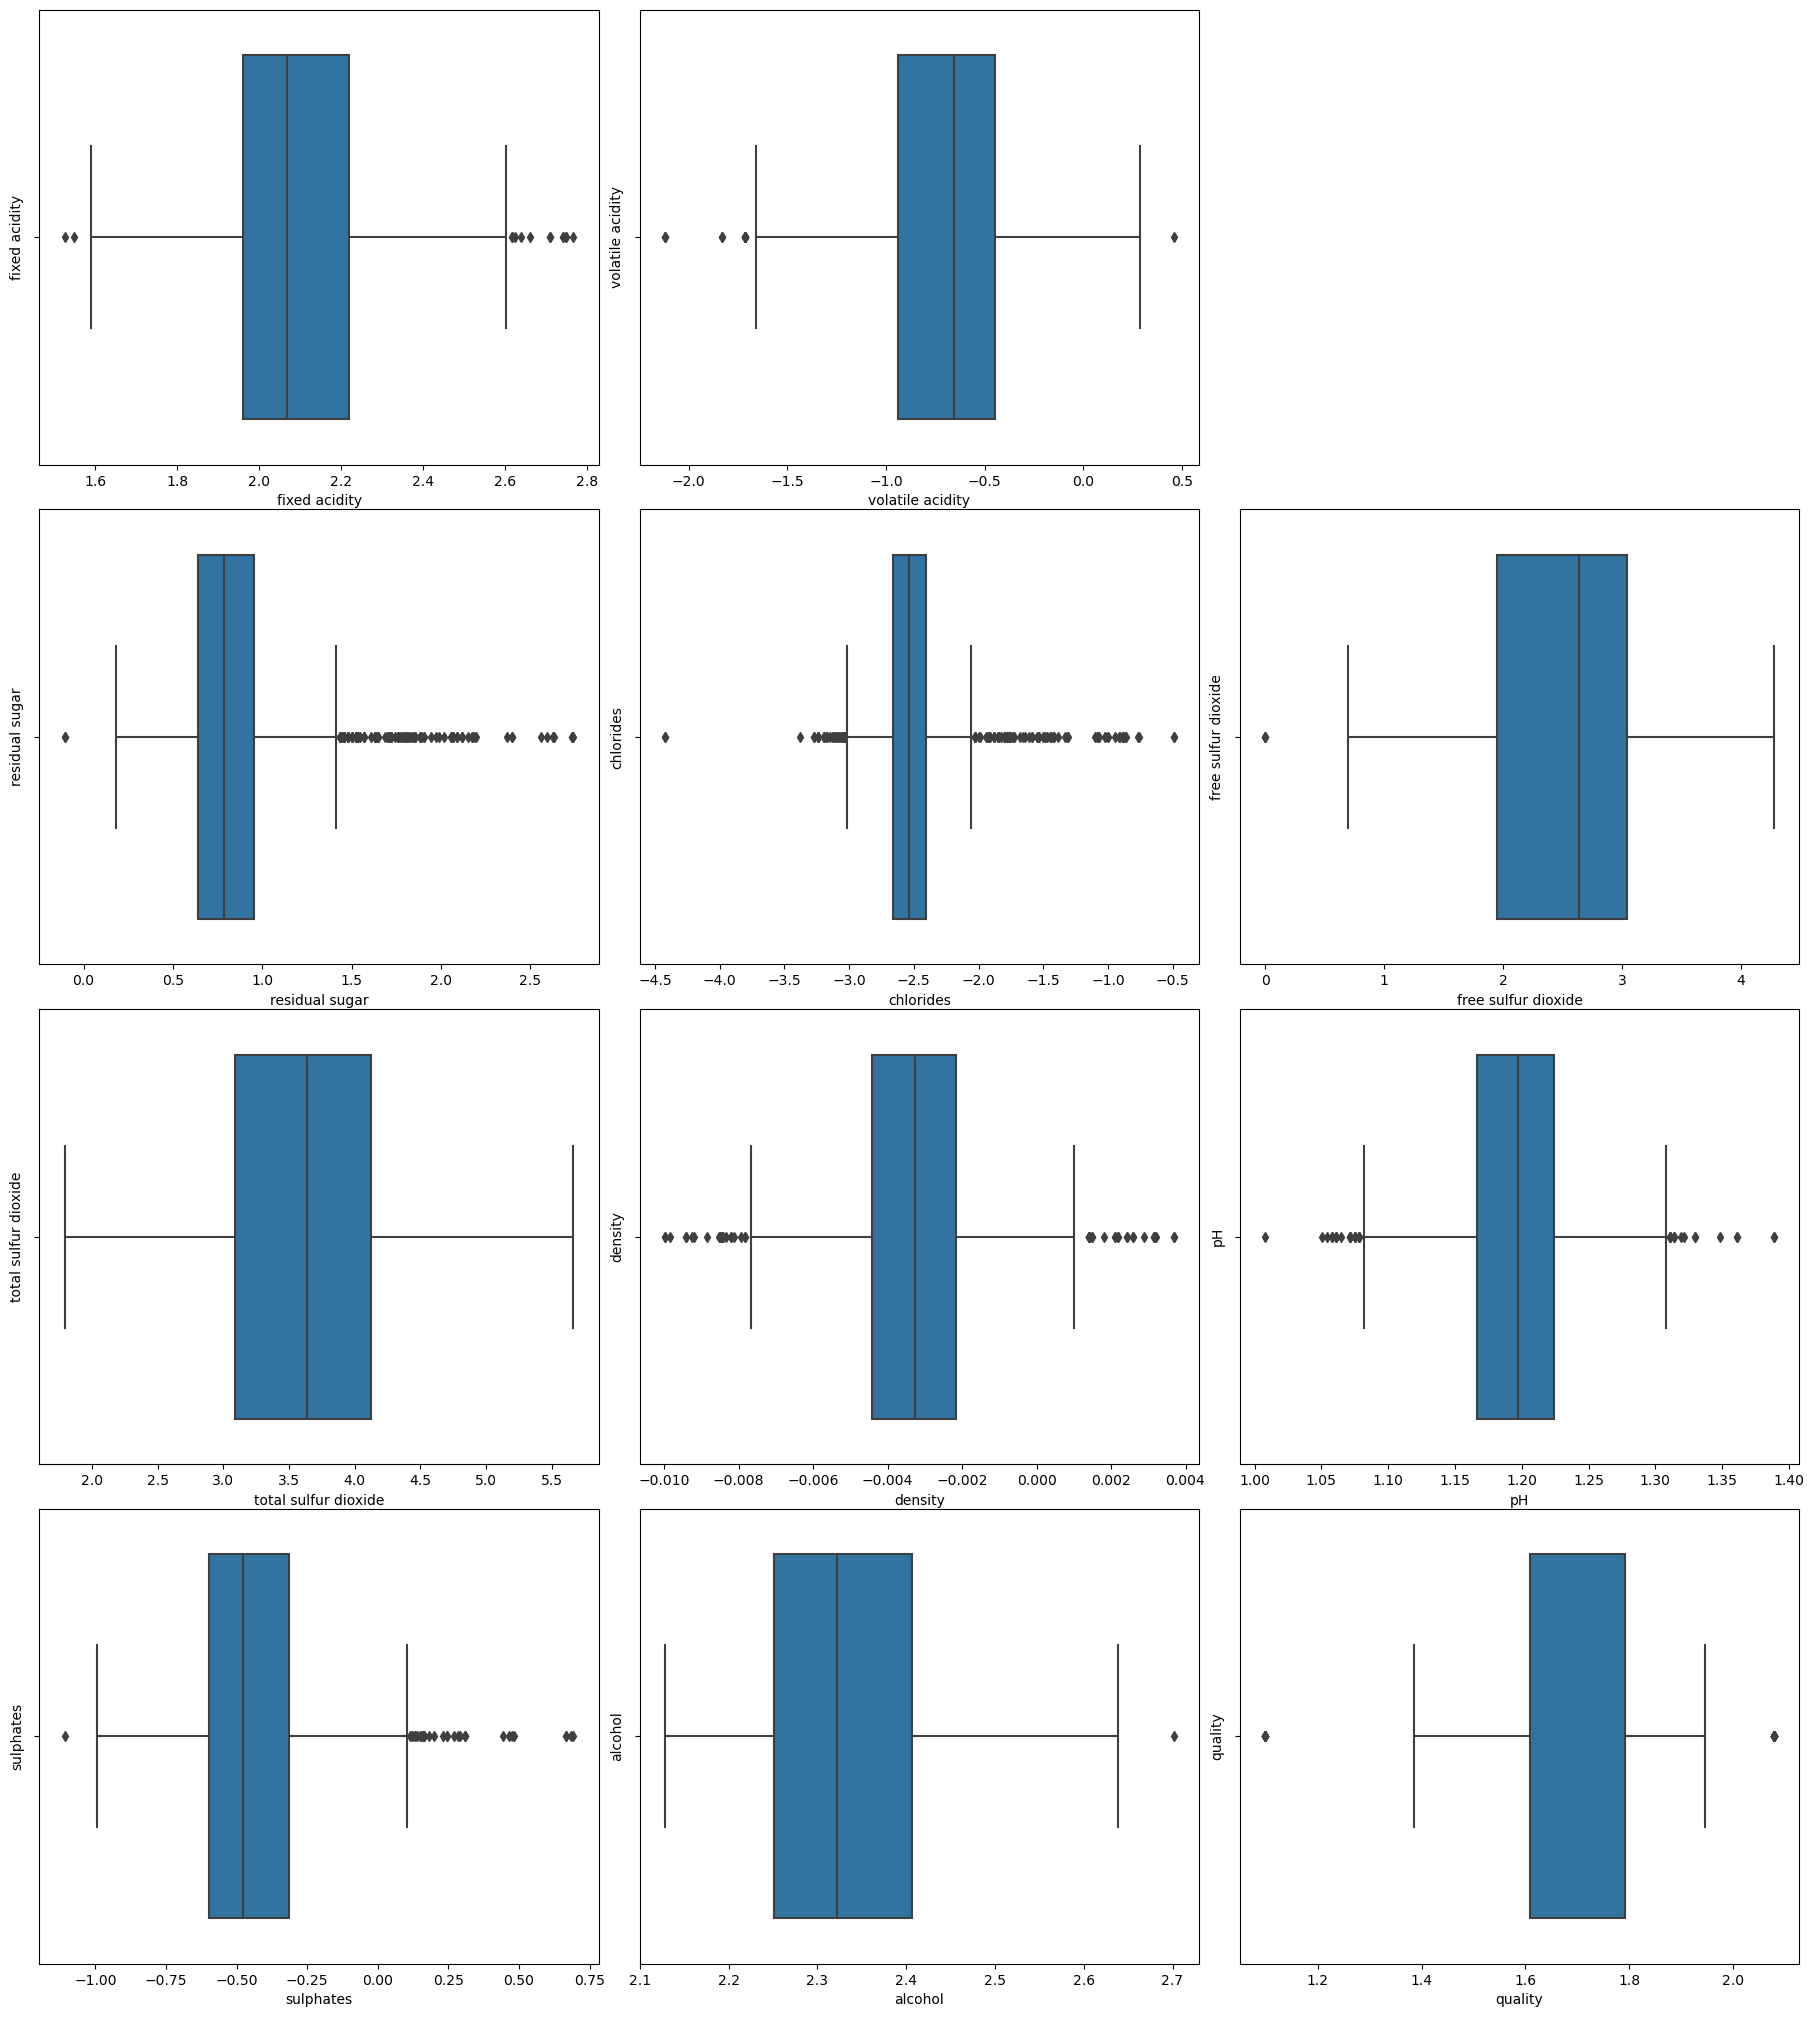

In [8]:
fig = plt.figure(figsize=(18, 20))
for index, feature in enumerate(features):
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.subplot(4, 3, index+1)
        sns.boxplot(data = data, x=feature)
        #data.boxplot(column=feature)
        plt.ylabel(feature)
fig.tight_layout(pad=0.1)

Nous nous rendons compte que nous avons plusieurs valeurs abérrantes. Principalement **residual sugar**, **Chlorides**, **Sulphatex**

### **Relation entre les variables indépendantes et la variable dépendante**

<Axes: >

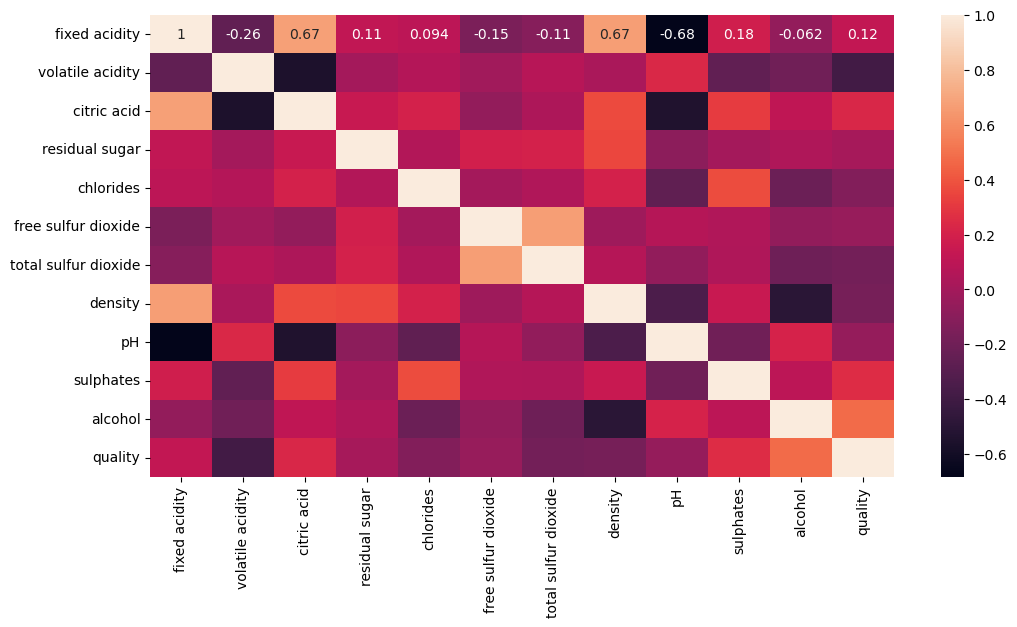

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

Nous remarquons que la densité et l'acide citrique sont tous les deux fortement correlé à l'acide fixe. La multicolinéarite n'est pas bonne pour les problèmes de regression, alors nous devons gérer cela plutard. Nous pouvons noter également qu'entre toutes les features, alcohol est celui qui est le plus correlé avec la qualité du vin.

### Scatter plots

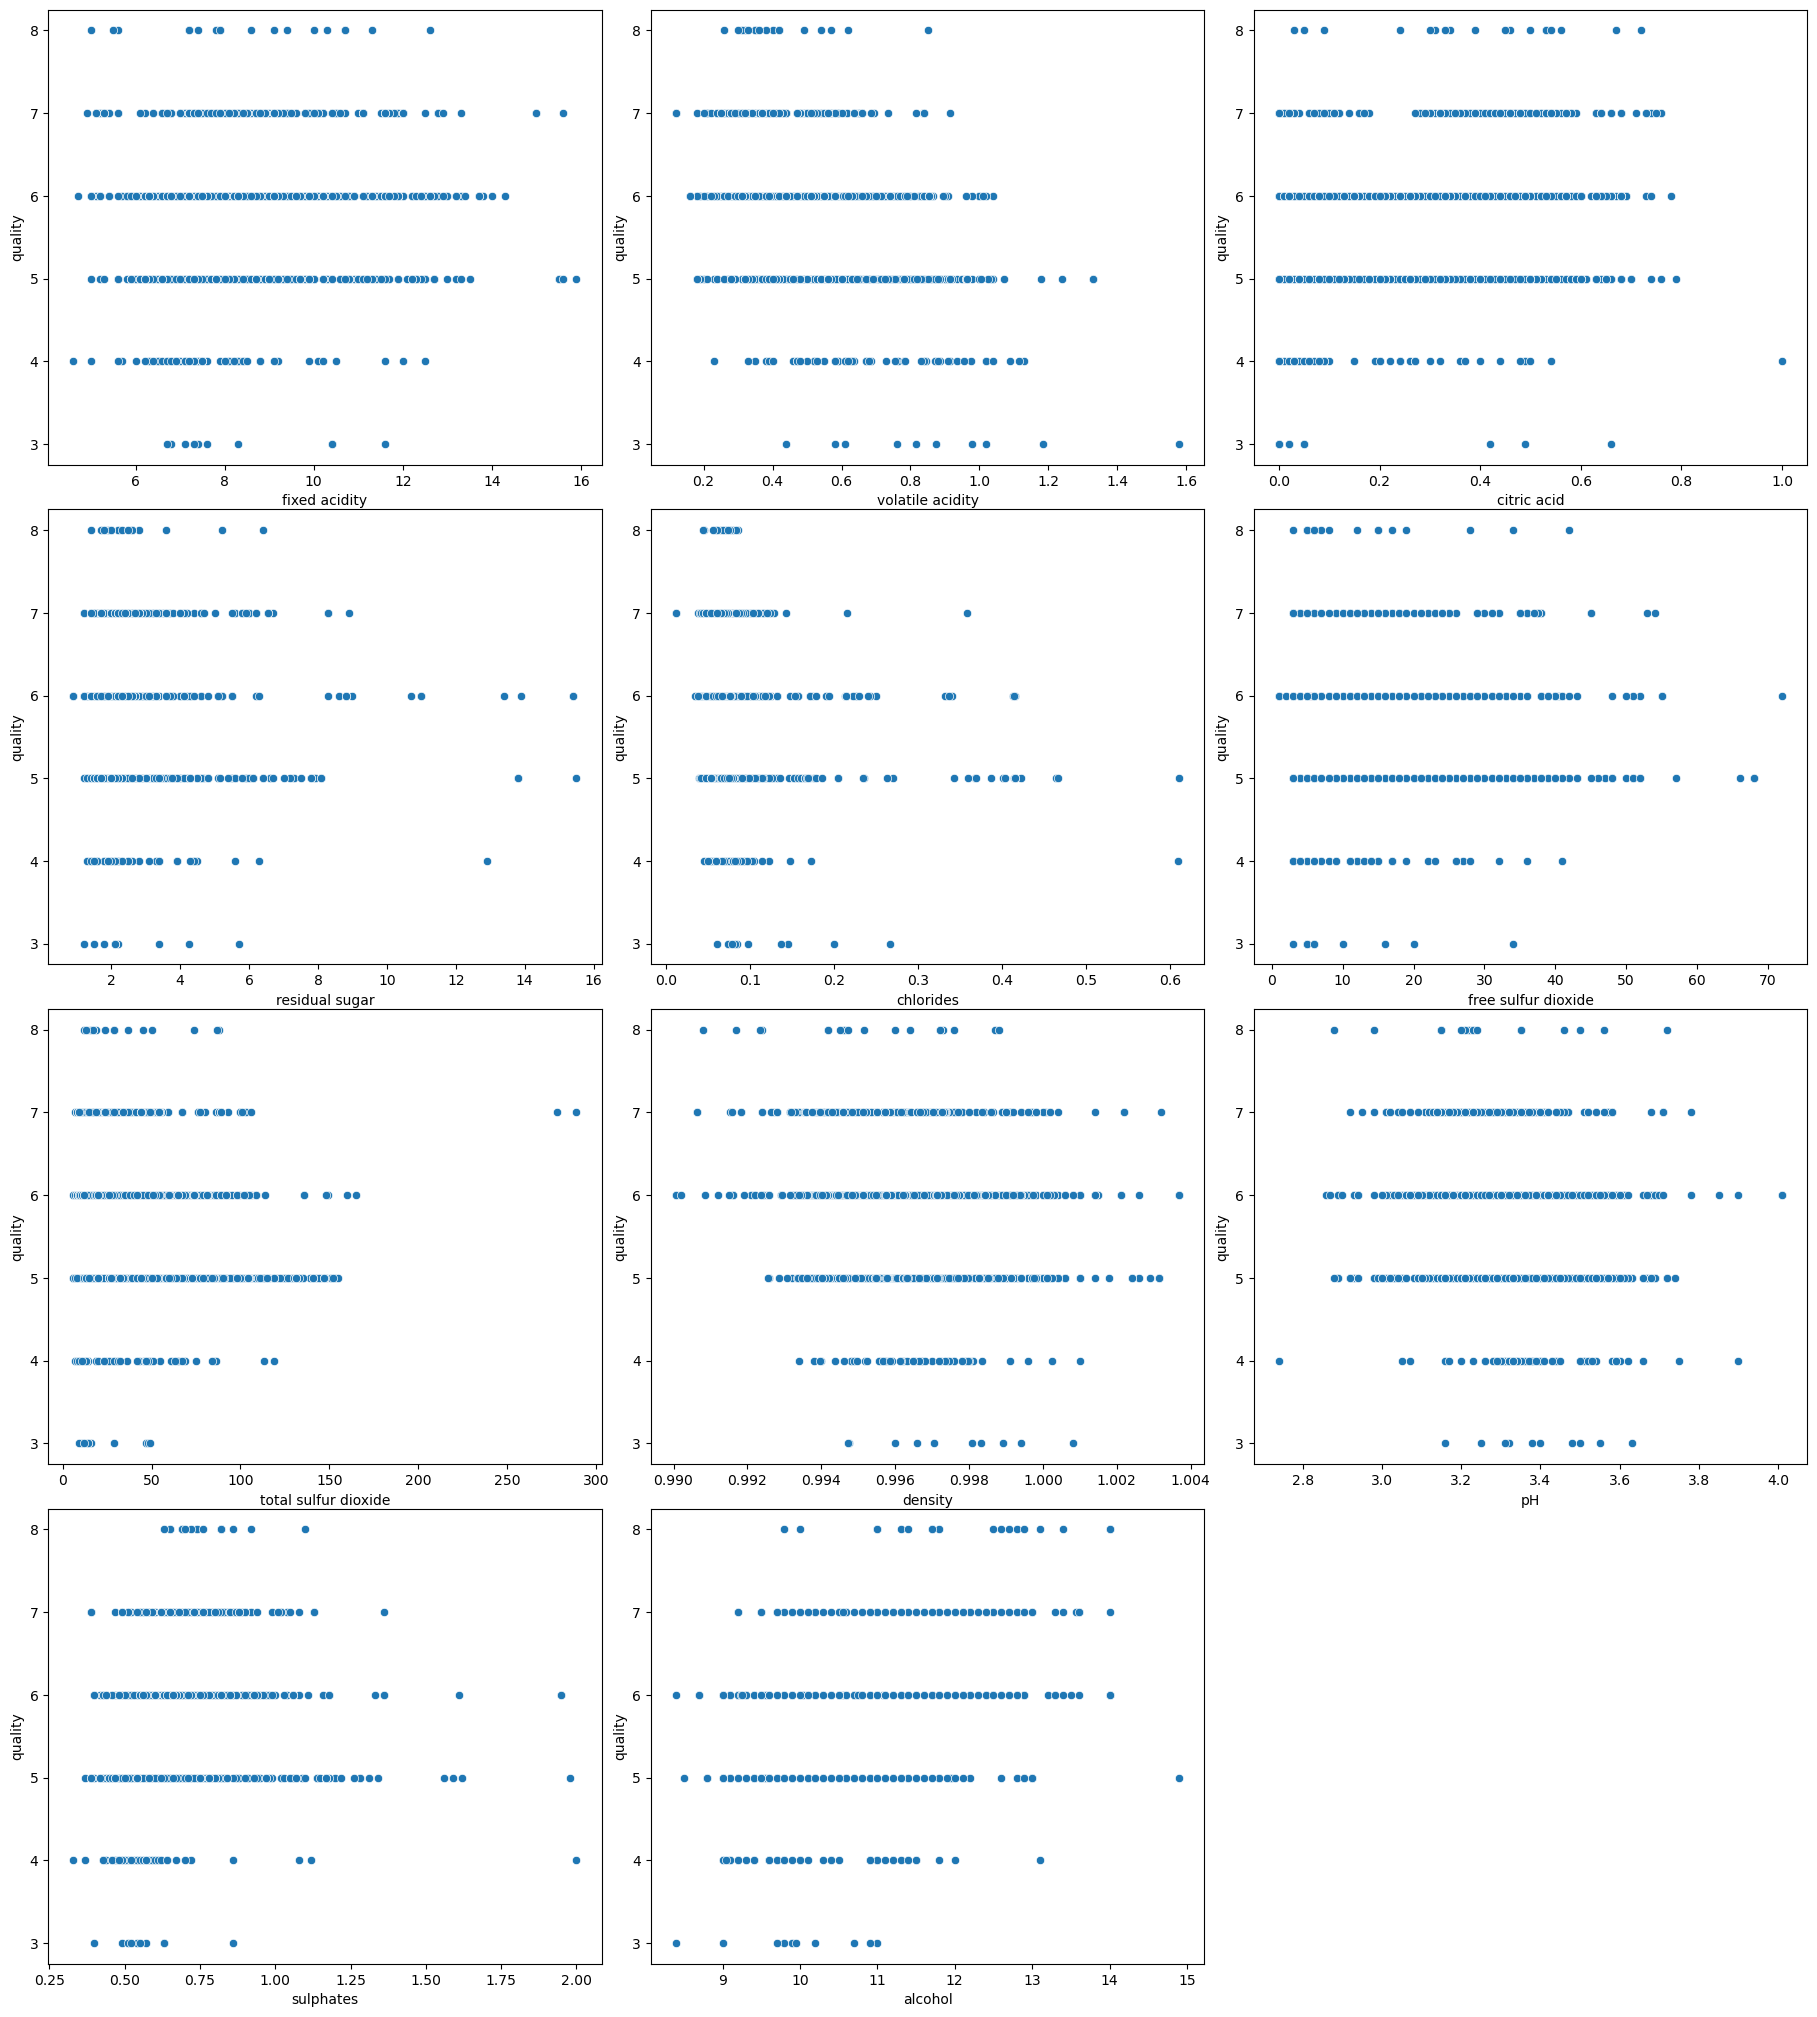

In [10]:
fig = plt.figure(figsize=(18, 20))
for index, feature in enumerate(features):
    if feature == 'quality':
        pass
    else:
        plt.subplot(4,3,index+1)
        sns.scatterplot(data=df, x=feature, y='quality')
fig.tight_layout(pad=0.1)

aucune tendance intéressante à noter...

## Feature Engineering

### Feature transformation

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df_copy = df.copy()

appliquons une transformation logarithmique pour réduire le skewness sur certaines features

In [13]:
for feature in features:
    if 0 in df_copy[feature].unique() or feature == 'quality':
        pass
    else:
        df_copy[feature] = np.log(df_copy[feature])
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5
1,2.054124,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,-0.003205,1.163151,-0.385662,2.282382,5
2,2.054124,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,-0.003005,1.181727,-0.430783,2.282382,5
3,2.415914,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,-0.002002,1.150572,-0.544727,2.282382,6
4,2.001480,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,-0.002202,1.255616,-0.579818,2.240710,5


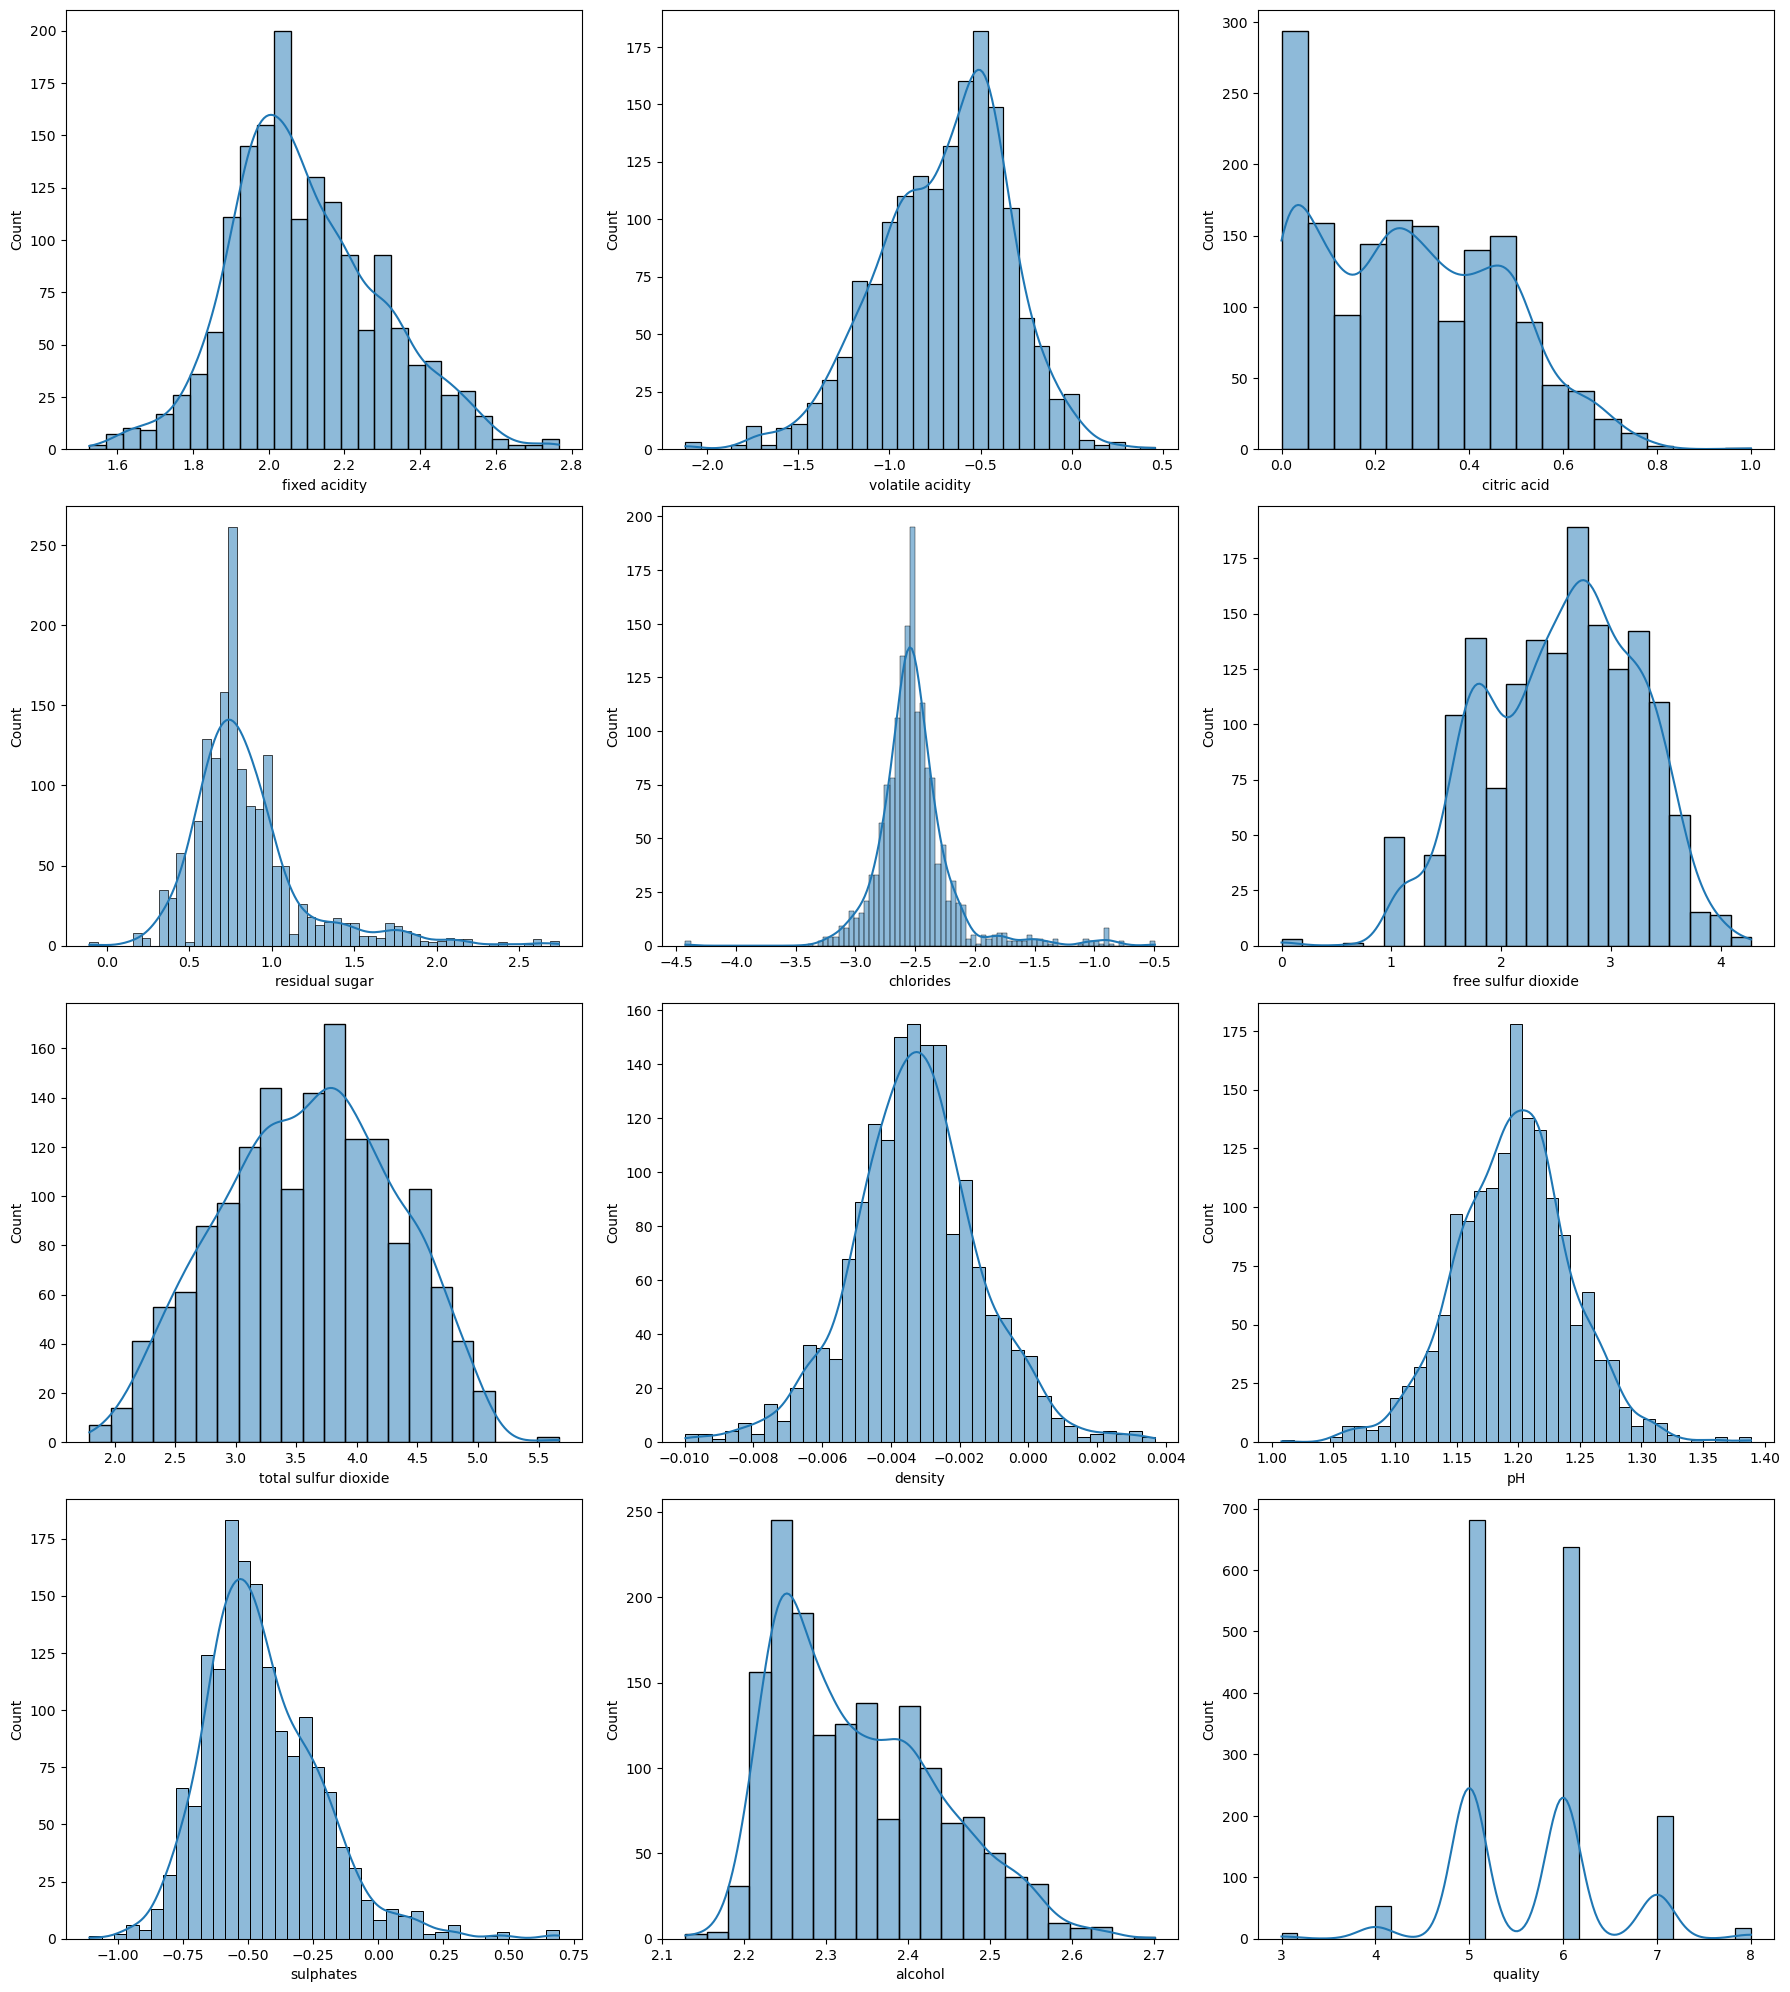

In [14]:
fig = plt.figure(figsize=(18, 20))
for index, column in enumerate(features):
    plt.subplot(4, 3, index+1)
    sns.histplot(df_copy[column], kde=True)
fig.tight_layout(pad=1.0)

Cela marche plutôt bien 😁

### Dealing with outliers

### multicolinear features

In [15]:
df_copy = df_copy.drop(["density", "fixed acidity"], axis=1)
df_copy.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,1.255616,-0.579818,2.240710,5
1,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,1.163151,-0.385662,2.282382,5
2,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,1.181727,-0.430783,2.282382,5
3,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,1.150572,-0.544727,2.282382,6
4,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,1.255616,-0.579818,2.240710,5


### Feature Selection

nous allons :
- Retirer les features avec une faible variance
- utiliser SelectKBest pour récupérer le top-k scoring features

### Removing feature with low variance

In [16]:
from sklearn.feature_selection import VarianceThreshold

data = df_copy.copy()
data = data.drop(['quality'], axis=1)
var_thresh = VarianceThreshold(threshold = 0.1)
transformed_data = var_thresh.fit_transform(data)

In [17]:
var_thresh.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False])

In [18]:
transformed_data

array([[-0.35667494,  0.64185389, -2.57702194,  2.39789527,  3.52636052],
       [-0.12783337,  0.95551145, -2.3227878 ,  3.21887582,  4.20469262],
       [-0.27443685,  0.83290912, -2.3859667 ,  2.7080502 ,  3.98898405],
       ...,
       [-0.67334455,  0.83290912, -2.57702194,  3.36729583,  3.68887945],
       [-0.43850496,  0.69314718, -2.59026717,  3.4657359 ,  3.78418963],
       [-1.17118298,  1.28093385, -2.70306266,  2.89037176,  3.73766962]])

In [19]:
selected_features_idx = []
for i, f in enumerate(var_thresh.get_support()):
    if f:
        selected_features_idx.append(i)

In [20]:
selected_features_idx

[0, 2, 3, 4, 5]

In [21]:
data.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,1.255616,-0.579818,2.240710
1,-0.127833,0.00,0.955511,-2.322788,3.218876,4.204693,1.163151,-0.385662,2.282382
2,-0.274437,0.04,0.832909,-2.385967,2.708050,3.988984,1.181727,-0.430783,2.282382
3,-1.272966,0.56,0.641854,-2.590267,2.833213,4.094345,1.150572,-0.544727,2.282382
4,-0.356675,0.00,0.641854,-2.577022,2.397895,3.526361,1.255616,-0.579818,2.240710


In [22]:
selected_features = data.columns[selected_features_idx]
selected_features

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide'],
      dtype='object')

In [23]:
df_copy_selected_features = df_copy[selected_features]
df_copy_selected_features.head()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,-0.356675,0.641854,-2.577022,2.397895,3.526361
1,-0.127833,0.955511,-2.322788,3.218876,4.204693
2,-0.274437,0.832909,-2.385967,2.708050,3.988984
3,-1.272966,0.641854,-2.590267,2.833213,4.094345
4,-0.356675,0.641854,-2.577022,2.397895,3.526361


In [24]:
y = df_copy['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_copy_selected_features, y, test_size=0.3, random_state=0)

In [26]:
X_train.head()

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
92,-0.713350,0.693147,-2.207275,2.944439,4.890349
1017,-1.714798,-0.105361,-3.015935,3.583519,4.691348
1447,-0.400478,0.641854,-2.525729,3.091042,3.663562
838,-1.171183,0.470004,-2.590267,2.197225,3.332205
40,-0.798508,1.774952,-2.603690,2.484907,4.465908


In [27]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=True)
mutual_info

volatile acidity        0.132557
residual sugar          0.031923
chlorides               0.016494
free sulfur dioxide     0.000000
total sulfur dioxide    0.097903
dtype: float64

In [28]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_regression, k=2)
sel_cols.fit(X_train, y_train)
k_best = X_train.columns[sel_cols.get_support()]
k_best

Index(['volatile acidity', 'total sulfur dioxide'], dtype='object')

## Modeling

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train_c = X_train[k_best]
X_test_c = X_test[k_best]
regr = LinearRegression()
regr.fit(X_train_c, y_train)
y_pred = regr.predict(X_test_c)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"the rmse for Linear Regression is : {rmse}")

the rmse for Linear Regression is : 0.7317181004942586


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train_c, y_train)
y_pred = regressor.predict(X_test_c)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"the rmse for Linear Regression is : {rmse}")

the rmse for Linear Regression is : 0.752571998835035


### XGBOOST

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, learning_rate=0.01)
xgb.fit(X_train_c, y_train)
y_pred = xgb.predict(X_test_c)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"the rmse for Linear Regression is : {rmse}")

the rmse for Linear Regression is : 0.7084240221055133


### Combine algorithm

In [40]:
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(estimators=[('rf', regressor), ('lr', regr), ('xgb', xgb)])
voting_regressor

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=1000,
                                                   random_state=0)),
                            ('lr', LinearRegression()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu...e,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.01, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [41]:
voting_regressor.fit(X_train_c, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=1000,
                                                   random_state=0)),
                            ('lr', LinearRegression()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu...e,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.01, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [42]:
y_pred = voting_regressor.predict(X_test_c)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"the rmse for Linear Regression is : {rmse}")

the rmse for Linear Regression is : 0.7024880305745053
